In [1]:
%matplotlib inline

import sys
import os
import numpy as np
import json
import pandas as pd
import traceback

sys.path.append(".") # add results folder as a python path 
from viz import *
from analyze import *
import scipy as sp

In [2]:
# Global variables and statistics
dataset = 'data21'
benchmark_name = 'CIFAR10-VGG (4 params)'
num_trials =5

param4_results = {}
opt_hours = 6
opt_secs = opt_hours * 60 * 60
s_path = "./{}/T{}S/".format(dataset, opt_secs)

param4_results['S-Div (4P)'] = load_json(s_path + 'DIV-SEQ.p6div-etr.HPO_runner.ETR-DecaTercet({})'.format(num_trials) + '.json')
param4_results['GP-EI (4P)'] = load_json(s_path + 'GP-EI.HPO_runner({})'.format(num_trials) + '.json')
keys = list(param4_results.keys())

In [3]:
max_accs = []
for i in range(num_trials):
    max_acc = max(param4_results['S-Div (4P)'][str(i)]['accuracy'])
    max_accs.append(max_acc)
print("S-Div (4P)\navg. {:.4f} ({:.4f})\nmax {}\n{}".format(np.mean(max_accs), np.std(max_accs), max(max_accs), max_accs))
sr_bests = max_accs

S-Div (4P)
avg. 0.7928 (0.0022)
max 0.7957000136375427
[0.7957000136375427, 0.7946000099182129, 0.7900000214576721, 0.7929999828338623, 0.7907000184059143]


In [4]:
max_accs = []
for i in range(num_trials):
    max_acc = max(param4_results['GP-EI (4P)'][str(i)]['accuracy'])
    max_accs.append(max_acc)
print("GP-EI (4P)\navg. {:.4f} ({:.4f})\nmax {}\n{}".format(np.mean(max_accs), np.std(max_accs), max(max_accs), max_accs))
gp_bests = max_accs

GP-EI (4P)
avg. 0.7922 (0.0016)
max 0.7954999804496765
[0.7954999804496765, 0.7914999723434448, 0.7914000153541565, 0.7914000153541565, 0.7914000153541565]


In [5]:
sp.stats.ttest_ind(sr_bests, gp_bests, equal_var=False)

Ttest_indResult(statistic=0.41044377338560928, pvalue=0.69311285847146742)

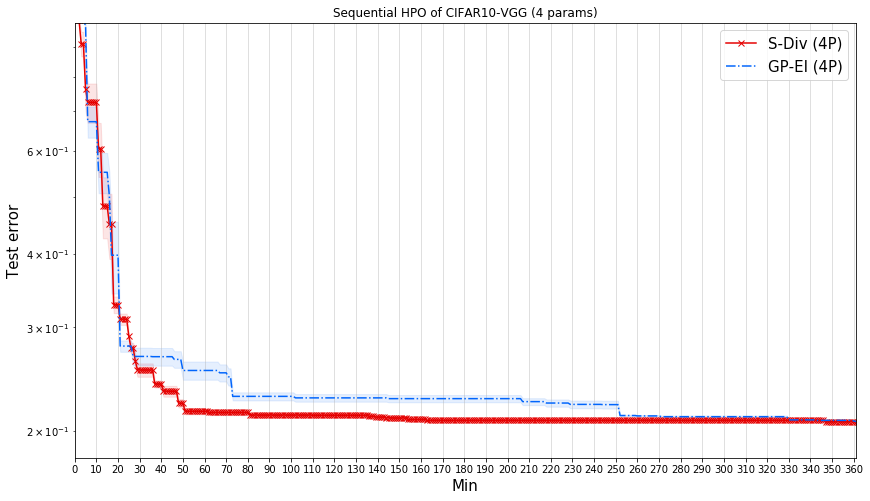

<module 'matplotlib.pyplot' from '/home/webofthink/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [6]:
draw_best_error_curve(param4_results, 
                      keys, 
                      num_trials, 
                      ylim=(.18, .99), xlim=(0, 60*opt_hours+1), 
                      summary=True, x_steps=10, x_unit='Min', 
                      title="Sequential HPO of {}".format(benchmark_name))

for i in range(num_trials):
    draw_trials_curve(param4_results, 'S-Div (4P)', i, ylim=(.1, .99), xlim=(0, opt_hours), title ="trial #{}".format(i),
                  width=15, height=8, loc=1 )

for i in range(num_trials):
    draw_trials_curve(param4_results, 'GP-EI (4P)', i, ylim=(.1, .99), xlim=(0, opt_hours), title ="trial #{}".format(i),
                  width=15, height=8, loc=1 )

In [7]:
# Global variables and statistics
dataset = 'data22'
benchmark_name = 'CIFAR10-VGG (17 params)'
num_trials = 5

param17_results = {}
opt_hours = 6
opt_secs = opt_hours * 60 * 60
s_path = "./{}/T{}S/".format(dataset, opt_secs)

param17_results['S-Div (17P)'] = load_json(s_path + 'DIV-SEQ.p6div-etr.HPO_runner.ETR-DecaTercet({})'.format(6) + '.json')
param17_results['RF-EI (17P)'] = load_json(s_path + 'RF-EI.HPO_runner({})'.format(num_trials) + '.json')
keys = list(param17_results.keys())

In [8]:
max_accs = []
for i in range(6):
    max_acc = max(param17_results['S-Div (17P)'][str(i)]['accuracy'])
    max_accs.append(max_acc)
print("S-Div (17P)\navg. {:.4f} ({:.4f})\nmax {}\n{}".format(np.mean(max_accs), np.std(max_accs), max(max_accs), max_accs))
sr_bests = max_accs

S-Div (17P)
avg. 0.7947 (0.0042)
max 0.8015000224113464
[0.7989000082015991, 0.7890999913215637, 0.7919999957084656, 0.7943000197410583, 0.8015000224113464, 0.7925000190734863]


In [9]:
max_accs = []
for i in range(num_trials):
    max_acc = max(param17_results['RF-EI (17P)'][str(i)]['accuracy'])
    max_accs.append(max_acc)
print("RF-EI (17P)\navg. {:.4f} ({:.4f})\nmax {}\n{}".format(np.mean(max_accs), np.std(max_accs), max(max_accs), max_accs))
rf_bests = max_accs

RF-EI (17P)
avg. 0.7977 (0.0071)
max 0.8064000010490417
[0.801800012588501, 0.8064000010490417, 0.7968000173568726, 0.7851999998092651, 0.7982000112533569]


In [10]:
sp.stats.ttest_ind(sr_bests, rf_bests, equal_var=False)

Ttest_indResult(statistic=-0.73910981968710343, pvalue=0.48680433506992904)

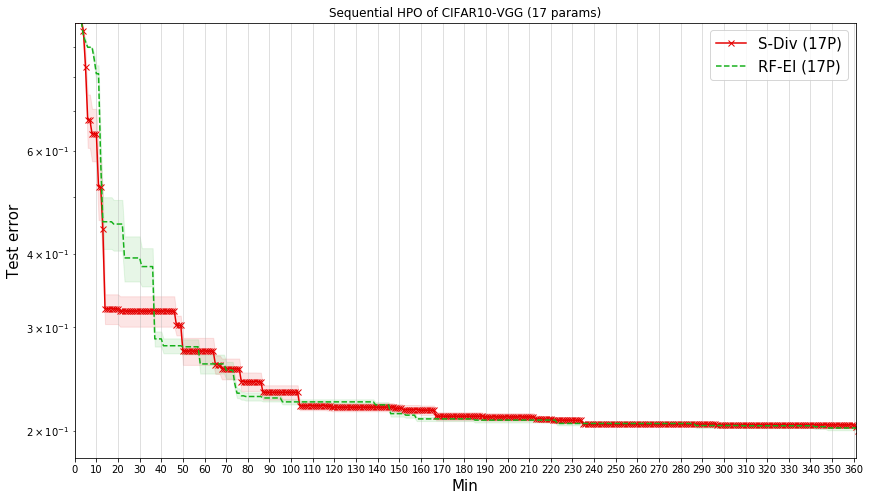

<module 'matplotlib.pyplot' from '/home/webofthink/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [11]:
draw_best_error_curve(param17_results, 
                      keys, 
                      num_trials, 
                      ylim=(.18, .99), xlim=(0, 60*opt_hours+1), 
                      summary=True, x_steps=10, x_unit='Min', 
                      title="Sequential HPO of {}".format(benchmark_name))

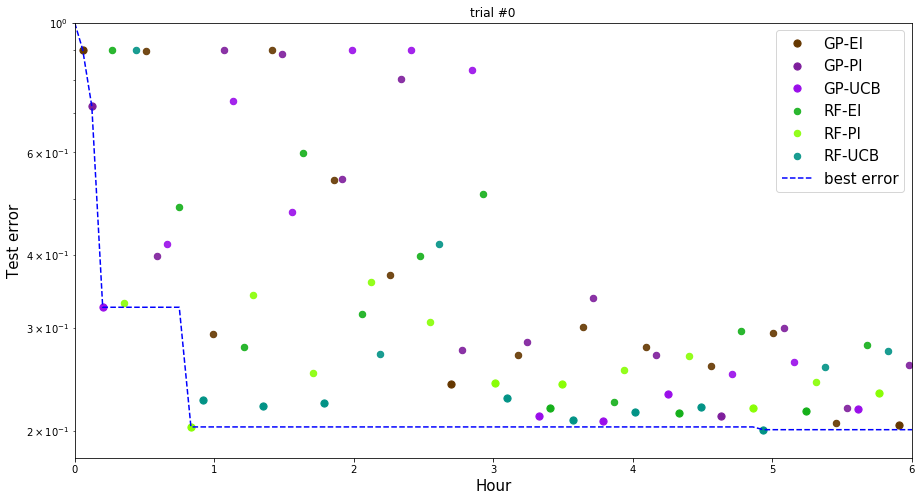

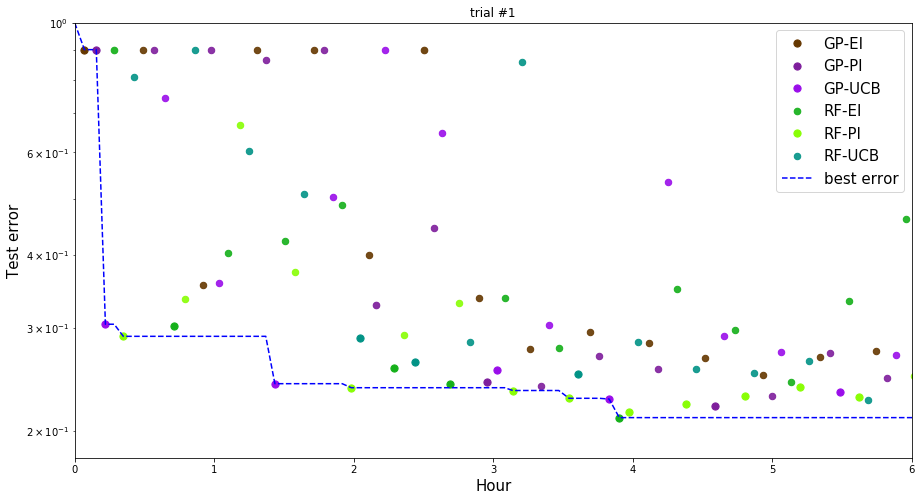

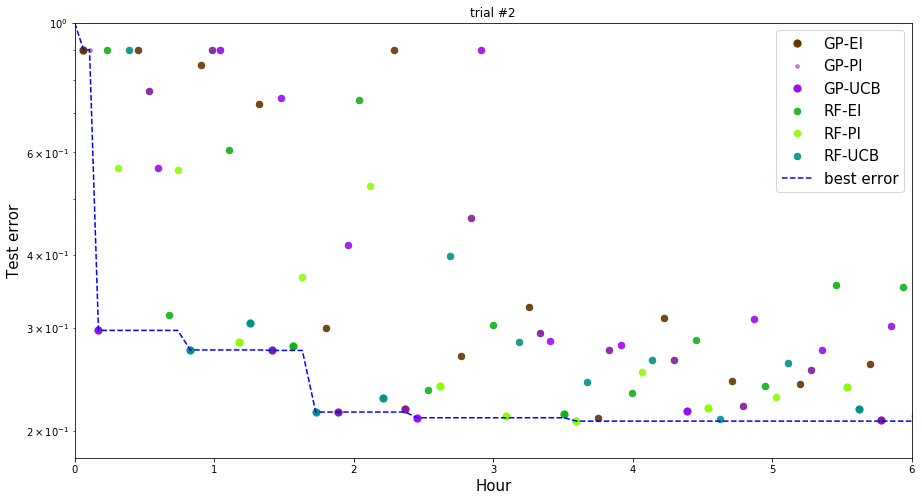

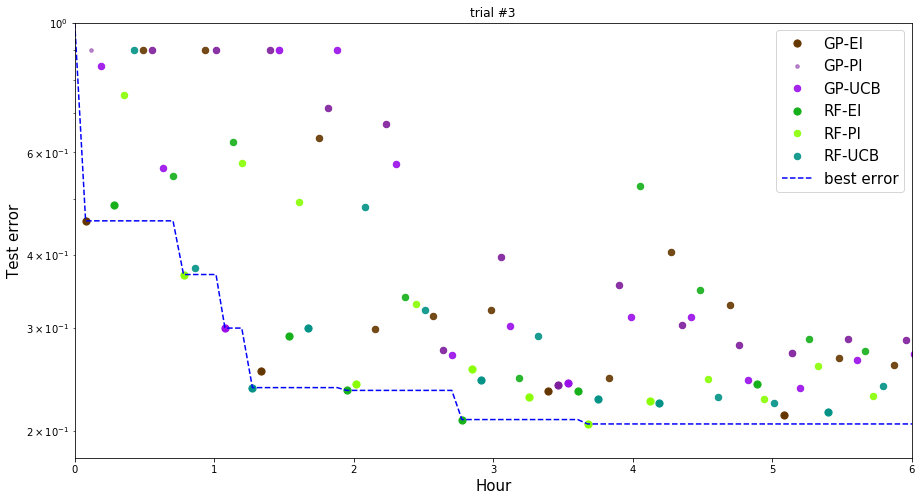

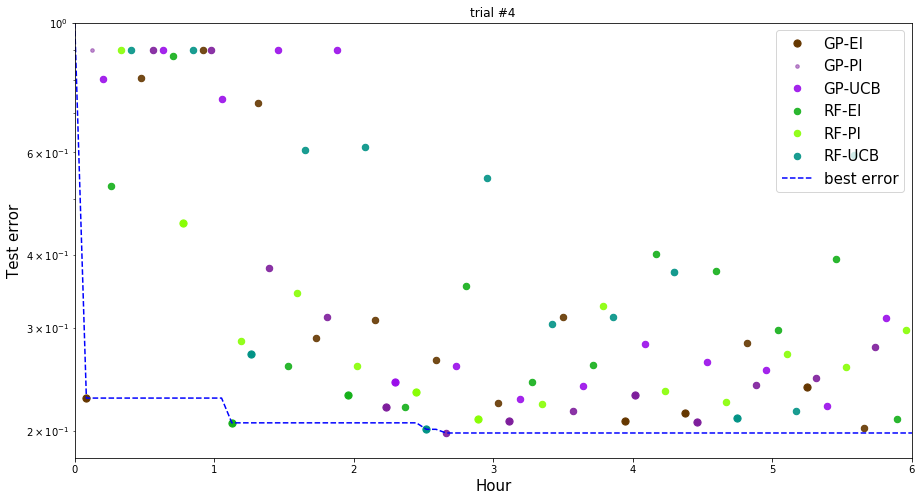

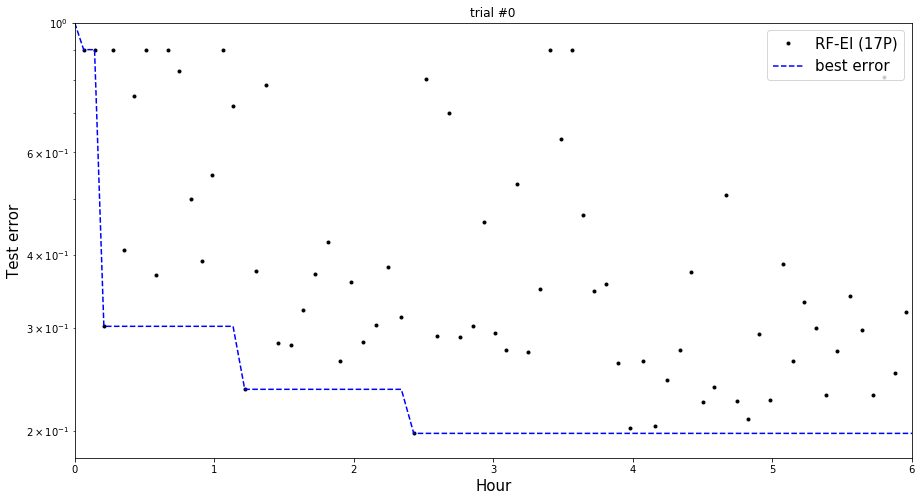

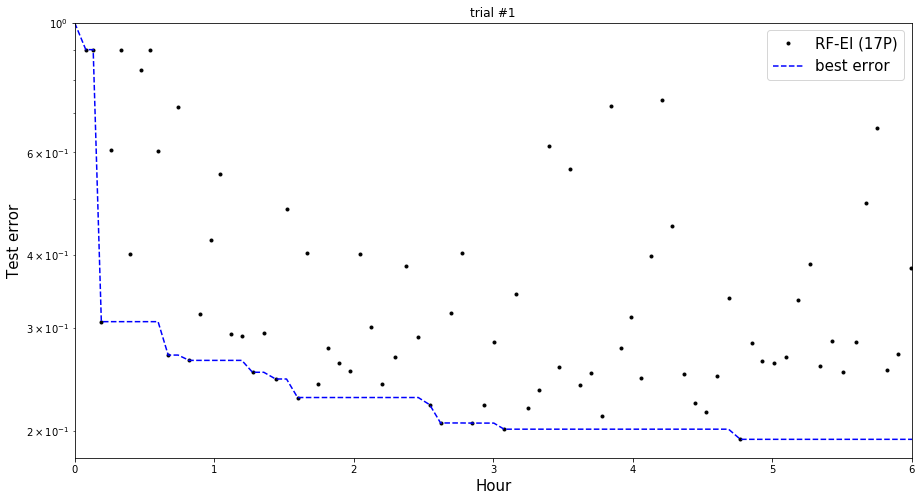

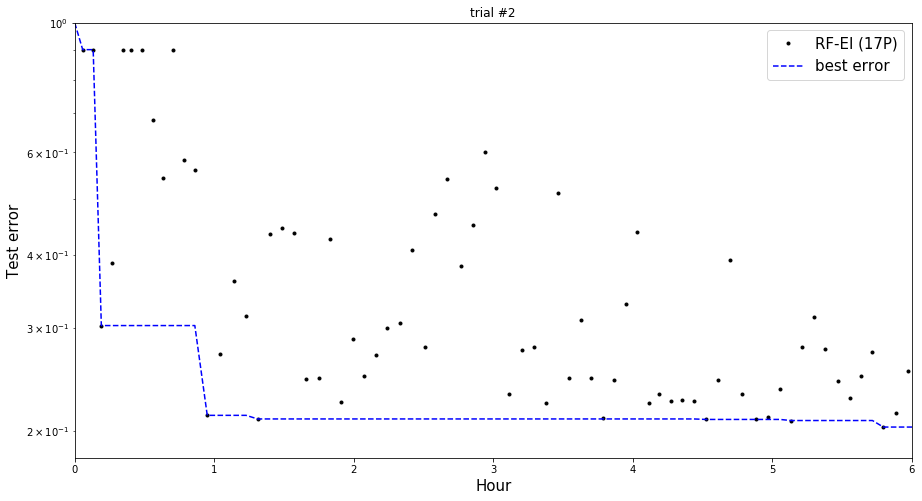

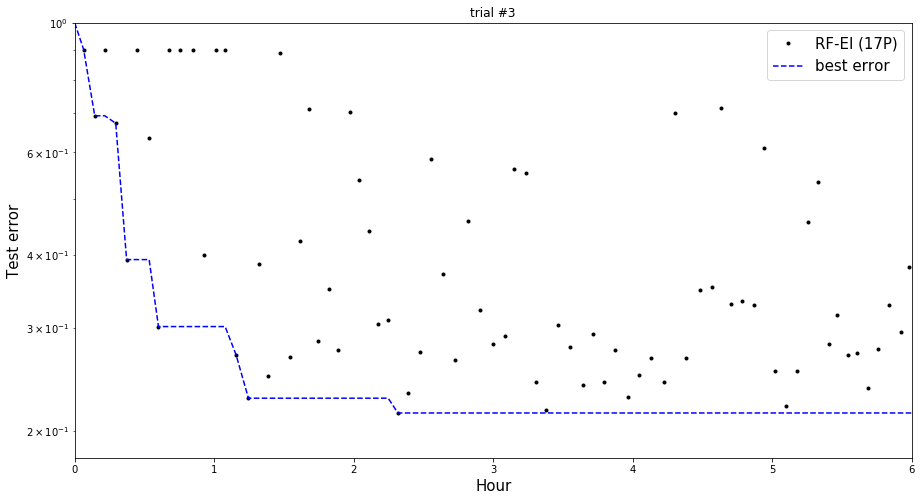

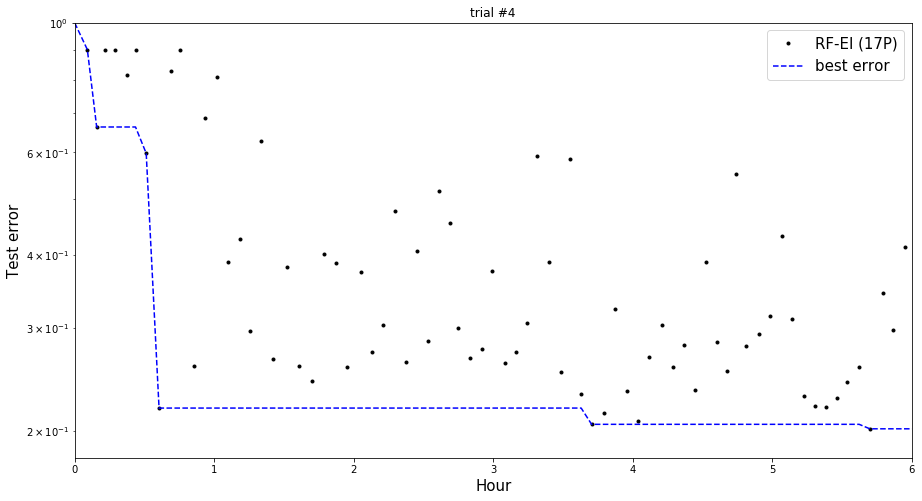

In [12]:
for k in keys:
    for i in range(num_trials):
        draw_trials_curve(param17_results, k, i, ylim=(.18, 1), xlim=(0, opt_hours), title ="trial #{}".format(i),
                      width=15, height=8, loc=1 )